In [48]:
import bs4 as bs
import datetime as dt
import os
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pickle
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def save_sp500_tickers():
    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker)
    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)
    return tickers

# save_sp500_tickers()
def get_data_from_yahoo(reload_sp500=True):
    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle", "rb") as f:
            tickers = pickle.load(f)

    start = dt.datetime(2010, 1, 1)
    end = dt.datetime.now()
    df_full = pd.DataFrame()
    tickers = tickers[20:30]
    for ticker in tickers:
          df = pdr.get_data_yahoo(ticker, start=start, end=end)
          df['Ticker'] = ticker[:-1]
          df.reset_index(inplace=True)
          df.set_index("Date", inplace=True)
          df_full = pd.concat([df_full,df])
    return df_full

stocks = get_data_from_yahoo()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
stocks = stocks.dropna(axis=0)
stocks = stocks.reset_index().pivot(index="Date", columns="Ticker", values=['Open','High','Low','Close','Adj Close','Volume'])

In [4]:
stocks = stocks.dropna(axis=1)
stocks

Open                                                            \
Ticker        AAL        AEE         ALL        AMD        AMZN        GOOG   
Date                                                                          
2010-01-04   4.84  28.030001   30.360001   9.790000    6.812500   15.615220   
2010-01-05   4.79  27.770000   30.480000   9.710000    6.671500   15.620949   
2010-01-06   5.19  27.610001   30.900000   9.680000    6.730000   15.588072   
2010-01-07   5.06  27.469999   30.850000   9.510000    6.600500   15.178109   
2010-01-08   5.27  27.219999   30.889999   9.370000    6.528000   14.744733   
...           ...        ...         ...        ...         ...         ...   
2023-05-01  13.60  88.709999  115.550003  91.029999  104.949997  107.720001   
2023-05-02  13.83  89.629997  115.129997  89.320000  101.470001  107.660004   
2023-05-03  13.79  89.510002  112.989998  83.540001  103.739998  106.220001   
2023-05-04  13.79  88.889999  109.970001  81.570000  104.040001  106.160004   
2023-05-05  13.73  89.870003  115.459999  84.989998  104.269997  105.320000   

                                               High  ...  Adj Close  \
Ticker           GOOGL        LNT         MO    AAL  ...         MO   
Date                                                 ...              
2010-01-04   15.689439  15.245000  19.770000   4.94  ...   9.206645   
2010-01-05   15.695195  15.185000  19.809999   5.37  ...   9.211298   
2010-01-06   15.662162  15.475000  19.850000   5.38  ...   9.346209   
2010-01-07   15.250250  15.610000  20.080000   5.43  ...   9.332254   
2010-01-08   14.814815  16.120001  20.040001   5.43  ...   9.355514   
...                ...        ...        ...    ...  ...        ...   
2023-05-01  106.839996  54.980000  47.549999  14.03  ...  47.779999   
2023-05-02  107.139999  55.040001  47.700001  13.87  ...  47.180000   
2023-05-03  105.529999  54.869999  47.240002  14.04  ...  46.529999   
2023-05-04  105.489998  54.380001  46.400002  13.89  ...  46.130001   
2023-05-05  104.820000  53.770000  46.160000  13.95  ...  46.689999   

                Volume                                                  \
Ticker             AAL        AEE        ALL          AMD         AMZN   
Date                                                                     
2010-01-04   9837300.0  1299300.0  2631000.0   18748700.0  151998000.0   
2010-01-05  25212000.0  1422200.0  5342100.0   22145700.0  177038000.0   
2010-01-06  16597900.0  1880300.0  3399500.0   18643400.0  143576000.0   
2010-01-07  14033400.0   936900.0  3694900.0   26806800.0  220604000.0   
2010-01-08  12760000.0   954100.0  2806800.0   13752800.0  196610000.0   
...                ...        ...        ...          ...          ...   
2023-05-01  29101800.0  1157200.0  1188800.0   59358700.0   74728100.0   
2023-05-02  22469800.0  1315800.0  2224300.0   70483500.0   73469400.0   
2023-05-03  20844800.0   789500.0  2979700.0  109482200.0   65051900.0   
2023-05-04  22983700.0  1682800.0  3413800.0  122840500.0   45345500.0   
2023-05-05  20608900.0  1325900.0  2244500.0   78407400.0   56912900.0   

                                                             
Ticker             GOOG        GOOGL        LNT          MO  
Date                                                         
2010-01-04   78541293.0   78169752.0  1332800.0  11048600.0  
2010-01-05  120638494.0  120067812.0  3684600.0  11742100.0  
2010-01-06  159744526.0  158988852.0  2092400.0  21307300.0  
2010-01-07  257533695.0  256315428.0  1404400.0  14983300.0  
2010-01-08  189680313.0  188783028.0  2466200.0  10822200.0  
...                 ...          ...        ...         ...  
2023-05-01   20926300.0   26681700.0  2086200.0   8844000.0  
2023-05-02   20343100.0   30997200.0  1217000.0   7606400.0  
2023-05-03   17116300.0   21795400.0  1136400.0   6536100.0  
2023-05-04   19780600.0   23419500.0  1725400.0   7333200.0  
2023-05-05   20705300.0   26625100.0  1649700.0   5962300.0  

[3358

In [5]:
closed = stocks['Close']

In [6]:
closed.corr()

Ticker,AAL,AEE,ALL,AMD,AMZN,GOOG,GOOGL,LNT,MO
Ticker,,,,,,,,,
AAL,1.000000,0.072877,0.238191,-0.290639,-0.063931,-0.036080,-0.026511,0.158843,0.819540
AEE,0.072877,1.000000,0.961751,0.841370,0.922839,0.924903,0.926486,0.990272,0.436735
ALL,0.238191,0.961751,1.000000,0.770317,0.876455,0.909324,0.911554,0.970421,0.547999
AMD,-0.290639,0.841370,0.770317,1.000000,0.907220,0.942405,0.940425,0.810284,0.069319
AMZN,-0.063931,0.922839,0.876455,0.907220,1.000000,0.940181,0.939570,0.912518,0.286690
GOOG,-0.036080,0.924903,0.909324,0.942405,0.940181,1.000000,0.999849,0.915631,0.323340
GOOGL,-0.026511,0.926486,0.911554,0.940425,0.939570,0.999849,1.000000,0.918025,0.333685
LNT,0.158843,0.990272,0.970421,0.810284,0.912518,0.915631,0.918025,1.000000,0.514708
MO,0.819540,0.436735,0.547999,0.069319,0.286690,0.323340,0.333685,0.514708,1.000000


# **Testing Causation using Granger’s Causality Test**

Vector AutoRegression predicts time series by considering their interdependence. With Granger's Causality Test, the relationship can be tested before model building. This test checks whether past values' coefficients in the regression equation are zero. X does not influence Y. Reject null if p-value < 0.05. Code executes Granger's Causality test on all series in dataframe, stores p-values in output matrix.

In [7]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(closed, variables = closed.columns) 

,AAL_x,AEE_x,ALL_x,AMD_x,AMZN_x,GOOG_x,GOOGL_x,LNT_x,MO_x
AAL_y,1.0000,0.1164,0.1990,0.0936,0.1302,0.1772,0.1819,0.1569,0.1772
AEE_y,0.0000,1.0000,0.0000,0.0152,0.0000,0.0000,0.0000,0.0000,0.1126
ALL_y,0.0269,0.0000,1.0000,0.0058,0.0005,0.0001,0.0000,0.0000,0.0009
AMD_y,0.2989,0.0050,0.0000,1.0000,0.0000,0.0001,0.0000,0.0034,0.0786
AMZN_y,0.0874,0.0000,0.0000,0.1364,1.0000,0.0000,0.0000,0.0000,0.0052
GOOG_y,0.3234,0.0017,0.0000,0.0062,0.0009,1.0000,0.0000,0.0185,0.0082
GOOGL_y,0.2879,0.0011,0.0000,0.0169,0.0004,0.0000,1.0000,0.0114,0.0058
LNT_y,0.0014,0.0000,0.0000,0.0056,0.0005,0.0000,0.0000,1.0000,0.5986
MO_y,0.0184,0.0002,0.0017,0.2228,0.3339,0.5675,0.5136,0.0000,1.0000


How to interpret the output: The rows represent the response variable (Y) and the columns represent the predictor variables (X). For example, the value 0.0003 in (1,2) is the p-value of pgnp_x affecting rgnp_y. 0.000 in (2,1) refers to p-value of rgnp_y causing pgnp_x. If p-value < 0.05, X column causes Y row. P-Value of 0.0003 at (row 1, column 2) suggests pgnp_x causes rgnp_y. P-Values suggest variables are causing each other.

# **Cointegration Test**

The Cointegration test verifies significant links between time series, but it is important to comprehend the meaning of Cointegration, which requires understanding the order of integration (d). The order of integration (d) indicates the number of differences needed to make a non-stationary time series stationary. If multiple time series have a linear combination with a lower order of integration than their individual series, they are considered cointegrated. When time series are cointegrated, they have a significant relationship. This is the premise of VAR models. Common to do cointegration test before VAR model. How to test?

In [8]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(closed)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
AAL    ::  218.6     > 179.5199  =>   True
AEE    ::  146.16    > 143.6691  =>   True
ALL    ::  99.1      > 111.7797  =>   False
AMD    ::  68.34     > 83.9383   =>   False
AMZN   ::  42.71     > 60.0627   =>   False
GOOG   ::  26.83     > 40.1749   =>   False
GOOGL  ::  12.51     > 24.2761   =>   False
LNT    ::  3.19      > 12.3212   =>   False
MO     ::  0.09      > 4.1296    =>   False


In [9]:
test = closed[['AAL','AEE']]
test

Ticker,AAL,AEE
Date,,
2010-01-04,4.77,27.760000
2010-01-05,5.31,27.650000
2010-01-06,5.09,27.459999
2010-01-07,5.24,27.200001
2010-01-08,5.14,27.010000
...,...,...
2023-05-01,13.89,89.629997
2023-05-02,13.77,89.110001
2023-05-03,13.79,88.650002


# **Split the Series into Training and Testing Data**

Split the dataset into training and test data. Fit the VAR model on df_train and forecast the next 4 observations. Forecasts will be compared to test data using various accuracy metrics.

In [29]:
nobs = 10
df_train, df_test = test[0:-nobs], test[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape) 

(3348, 2)
(10, 2)


# **Check for Stationarity and Make the Time Series Stationary**

To use VAR model, check time series for stationarity first. A stationary time series has constant mean and variance. How to test stationarity? Unit-root tests include ADF, KPSS, and Philip-Perron. ADF is used for this purpose. If a series is non-stationary, make it stationary by differencing once and repeating the test until it's stationary. Differencing reduces series length by 1, so all series in the system must be differenced for consistency.

ADF Test implementation: Function adfuller_test() prints ADF test results for given time series. Implement on each series one-by-one.

In [18]:
from statsmodels.tsa.stattools import adfuller

def adjust(val, length= 6): return str(val).ljust(length)

def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 

In [19]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

<ipython-input-19-6190c5bd6949>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


    Augmented Dickey-Fuller Test on "AAL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.7166
 No. Lags Chosen       = 1
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.4226. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "AEE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.6868
 No. Lags Chosen       = 16
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.8501. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.




The ADF test confirms none of the time series is stationary. Let’s difference all of them once and check again.

In [20]:
# 1st difference
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
for name, column in df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

<ipython-input-20-ca62e779d974>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_differenced.iteritems():


    Augmented Dickey-Fuller Test on "AAL" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -54.3597
 No. Lags Chosen       = 0
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "AEE" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -14.6092
 No. Lags Chosen       = 15
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




All the series are now stationary. Let’s prepare the training and test datasets.

# **How to Select the Order (P) of VAR model**

To determine the optimal VAR model order, fit increasing orders and choose the one with the lowest AIC, or consider alternative comparison estimates such as BIC, FPE, and HQIC.

In [21]:
from statsmodels.tsa.api import VAR

model = VAR(df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Lag Order = 1
AIC :  -1.0360073782031594
BIC :  -1.0250356264551848
FPE :  0.35486871413654514
HQIC:  -1.0320826005387764 

Lag Order = 2
AIC :  -1.0383405740031886
BIC :  -1.0200497457458746
FPE :  0.35404170234855775
HQIC:  -1.0317975416852305 

Lag Order = 3
AIC :  -1.0404375197391245
BIC :  -1.0148239512387731
FPE :  0.353300076712083
HQIC:  -1.0312748424482066 

Lag Order = 4
AIC :  -1.044489163665085
BIC :  -1.0115491882198824
FPE :  0.35187153140469385
HQIC:  -1.0327054499224653 

Lag Order = 5
AIC :  -1.044549030246487
BIC :  -1.0042789781832067
FPE :  0.351850474277601
HQIC:  -1.030142887412755 

Lag Order = 6
AIC :  -1.0469888599991721
BIC :  -0.9993850586698715
FPE :  0.3509930763152302
HQIC:  -1.0299588942729336 

Lag Order = 7
AIC :  -1.0483236237175246
BIC :  -0.9933823974962384
FPE :  0.3505249108439806
HQIC:  -1.028668440134086 

Lag Order = 8
AIC :  -1.0466250165808817
BIC :  -0.9843426868603103
FPE :  0.3511208403398861
HQIC:  -1.0243432190109318 

Lag Order = 9
AIC :

AIC is lowest at lag 4, so let's choose that model. An alternate method to choose the order(p) of VAR models is to use model.select_order(maxlags) which selects the lowest scores for AIC, BIC, FPE, and HQIC.

In [22]:
x = model.select_order(maxlags=12)
x.summary()

,AIC,BIC,FPE,HQIC
0,-1.015,-1.012,0.3623,-1.014
1,-1.030,-1.019*,0.3570,-1.026
2,-1.033,-1.015,0.3559,-1.026
3,-1.036,-1.010,0.3550,-1.026
4,-1.040,-1.007,0.3534,-1.028
5,-1.041,-1.001,0.3531,-1.026
6,-1.044,-0.9962,0.3521,-1.027
7,-1.046,-0.9907,0.3514,-1.026
8,-1.045,-0.9823,0.3518,-1.022
9,-1.056,-0.9864,0.3478,-1.031


According to FPE and HQIC, the optimal lag is observed at a lag order of 10.

# **Train the VAR Model of Selected Order(p)**

In [23]:
model_fitted = model.fit(10)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, May, 2023
Time:                     21:31:38
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                  -0.983669
Nobs:                     3335.00    HQIC:                  -1.03311
Log likelihood:          -7653.69    FPE:                   0.346233
AIC:                     -1.06064    Det(Omega_mle):        0.341913
--------------------------------------------------------------------
Results for equation AAL
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.002890         0.012607            0.229           0.819
L1.AAL          0.061766         0.017428            3.544           0.000
L1.AEE         -0.005288         0.015593           -0.339           0.735
L2.AAL     

# **Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic**

Serial correlation of residuals checks for pattern in errors. If present, it indicates unexplained pattern in time series. To improve the model, increase order, add predictors, or try different algorithm. Check for serial correlation to explain patterns in time series. Returning to topic, Durbin Watson’s Statistic is a common method for testing for serial error correlation. The statistic value ranges from 0 to 4. If it's close to 2, there's no correlation. Closer to 0 = positive correlation. Closer to 4 = negative correlation.

In [24]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(closed.columns, out):
    print(adjust(col), ':', round(val, 2))

AAL    : 2.0
AEE    : 2.0


# **How to Forecast VAR model using statsmodels**

To forecast with the VAR model, past data up to the lag order number of observations is needed as the terms in the model are time series lags.

In [25]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

10


array([[-0.2699995 ,  2.85999298],
       [ 0.11999989,  0.80000305],
       [ 0.13999939, -0.05999756],
       [ 0.17000008,  0.15999603],
       [-1.31999969, -0.19999695],
       [-0.05000019,  0.12999725],
       [-0.15999985, -0.63999939],
       [ 0.31000042,  0.27999878],
       [ 0.18999958, -1.44999695],
       [ 0.34000015,  1.        ]])

In [38]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=test.index[-nobs:], columns=test.columns + '_1d')
df_forecast

Ticker,AAL_1d,AEE_1d
Date,,
2023-04-24,0.079650,-0.117153
2023-04-25,-0.008987,-0.051488
2023-04-26,0.058906,0.150728
2023-04-27,-0.065869,-0.286799
2023-04-28,0.029395,0.206074
2023-05-01,-0.023192,-0.208509
2023-05-02,-0.021270,0.168052
2023-05-03,-0.001388,-0.111677
2023-05-04,0.004057,0.227233


Forecasts need to be de-differenced to return to the original scale, requiring the number of differences made during the model's training data.

# **Invert the transformation to get the real forecast**

In [39]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [47]:
df_results = invert_transformation(test, df_forecast, second_diff=False)   
df_results[df_results.columns[-2:]]

Ticker,AAL_forecast,AEE_forecast
Date,,
2023-04-24,13.949650,90.352849
2023-04-25,13.940663,90.301361
2023-04-26,13.999569,90.452088
2023-04-27,13.933700,90.165289
2023-04-28,13.963096,90.371363
2023-05-01,13.939903,90.162854
2023-05-02,13.918633,90.330906
2023-05-03,13.917245,90.219229
2023-05-04,13.921301,90.446462


# **Plot of Forecast vs Actuals**

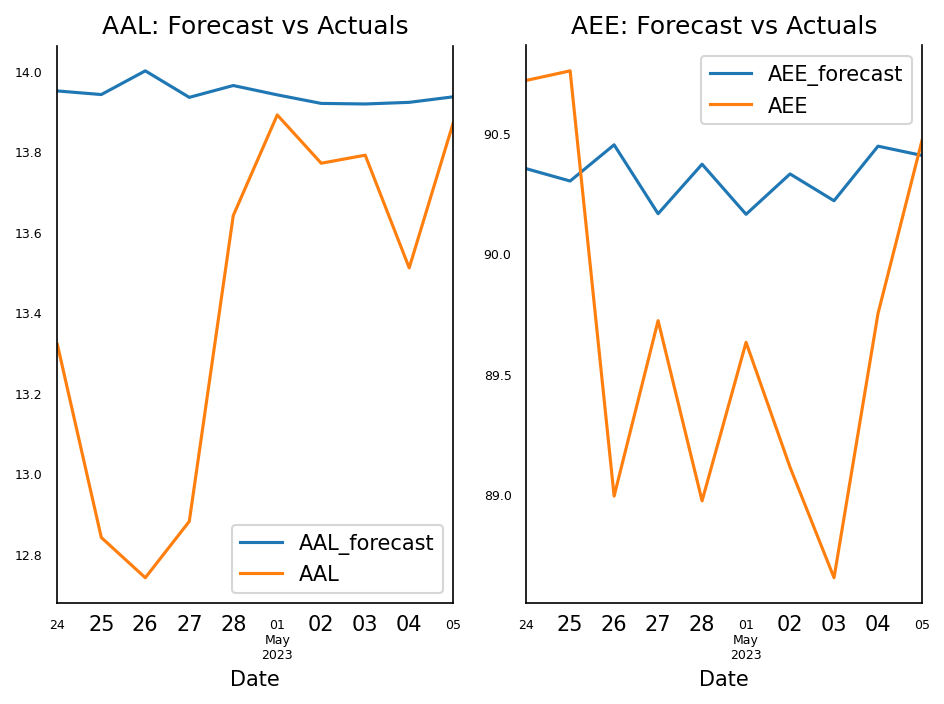

In [54]:
fig, axes = plt.subplots(nrows=int(len(test.columns)/2), ncols=2, dpi=150)

for i, (col,ax) in enumerate(zip(test.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

# **Evaluate the Forecasts**

In [55]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

print('Forecast Accuracy of: AAL')
accuracy_prod = forecast_accuracy(df_results['AAL_forecast'].values, df_test['AAL'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

print('\nForecast Accuracy of: AEE')
accuracy_prod = forecast_accuracy(df_results['AEE_forecast'].values, df_test['AEE'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: AAL
mape   :  0.0396
me     :  0.5169
mae    :  0.5169
mpe    :  0.0396
rmse   :  0.6799
corr   :  -0.5288
minmax :  0.037

Forecast Accuracy of: AEE
mape   :  0.0092
me     :  0.644
mae    :  0.8216
mpe    :  0.0072
rmse   :  0.968
corr   :  0.0865
minmax :  0.0091


<ipython-input-55-683a770b75d4>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
<ipython-input-55-683a770b75d4>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)


# **Conclusion**

We covered VAR from intuition to accuracy metrics, including interpreting the formula, causality tests, optimal order, data preparation, model building, autocorrelation and forecast accuracy.

# **Vector Autoregression (VAR) for house property sales**

In [92]:
raw_sales = pd.read_csv('raw_sales.csv')
raw_sales.index = raw_sales['datesold']
raw_sales = raw_sales.drop(columns='datesold')
raw_sales.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07 00:00:00,2607,525000,house,4
2007-02-27 00:00:00,2906,290000,house,3
2007-03-07 00:00:00,2905,328000,house,3
2007-03-09 00:00:00,2905,380000,house,4
2007-03-21 00:00:00,2906,310000,house,3


In [93]:
raw_sales['bedrooms'].value_counts()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64

In [94]:
raw_sales = raw_sales[~raw_sales.index.duplicated()]

In [95]:
time_series = pd.DataFrame(np.nan, index = raw_sales.index, columns=['bedroom' + str(bedroom) for bedroom in set(raw_sales['bedrooms'].value_counts().index)])

for bedroom in set(raw_sales['bedrooms'].value_counts().index):
  col = 'bedroom' + str(bedroom)
  time_series[col] = raw_sales[raw_sales['bedrooms']==bedroom]['price']

time_series

,bedroom0,bedroom1,bedroom2,bedroom3,bedroom4,bedroom5
datesold,,,,,,
2007-02-07 00:00:00,NaN,NaN,NaN,NaN,525000.0,NaN
2007-02-27 00:00:00,NaN,NaN,NaN,290000.0,NaN,NaN
2007-03-07 00:00:00,NaN,NaN,NaN,328000.0,NaN,NaN
2007-03-09 00:00:00,NaN,NaN,NaN,NaN,380000.0,NaN
2007-03-21 00:00:00,NaN,NaN,NaN,310000.0,NaN,NaN
...,...,...,...,...,...,...
2018-07-15 00:00:00,NaN,NaN,NaN,496500.0,NaN,NaN
2018-08-05 00:00:00,NaN,NaN,339500.0,NaN,NaN,NaN
2018-09-02 00:00:00,NaN,NaN,NaN,595000.0,NaN,NaN


<Axes: xlabel='datesold'>

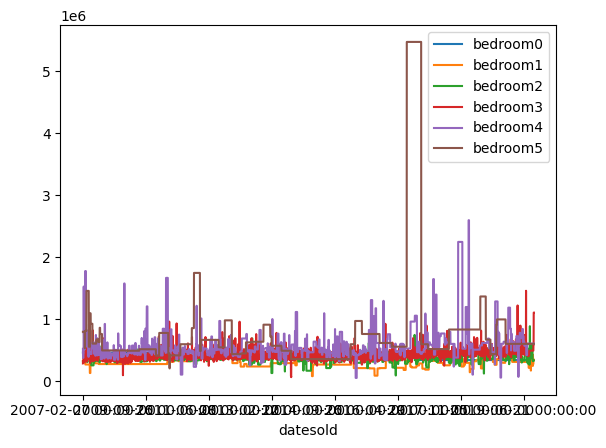

In [102]:
time_series.fillna(method='bfill').fillna(method='ffill').plot()

<Axes: xlabel='datesold'>

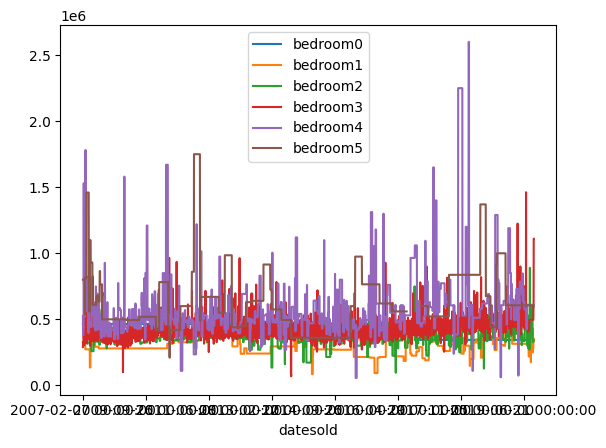

In [103]:
time_series.fillna(method='bfill').fillna(method='ffill')[time_series.fillna(method='bfill').fillna(method='ffill')<3e6].plot()

In [106]:
time_series = time_series.fillna(method='bfill').fillna(method='ffill')[time_series.fillna(method='bfill').fillna(method='ffill')<3e6].dropna()

In [107]:
time_series.isna().sum()

bedroom0    0
bedroom1    0
bedroom2    0
bedroom3    0
bedroom4    0
bedroom5    0
dtype: int64

In [108]:
grangers_causation_matrix(time_series, variables = time_series.columns) 

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 3, but rank is 2
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 5, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 6, but rank is 1
  warnings.warn('covariance of constraints does not have full '
/usr/local/l

,bedroom0_x,bedroom1_x,bedroom2_x,bedroom3_x,bedroom4_x,bedroom5_x
bedroom0_y,1.0000,0.5901,0.9852,0.9347,0.5553,0.9933
bedroom1_y,0.1114,1.0000,0.0000,0.0845,0.0094,0.0002
bedroom2_y,0.0000,0.0007,1.0000,0.0094,0.0927,0.0211
bedroom3_y,0.0000,0.0000,0.0000,1.0000,0.0013,0.0000
bedroom4_y,0.0002,0.6329,0.2702,0.0076,1.0000,0.2243
bedroom5_y,0.1920,0.1173,0.6928,0.1791,0.1228,1.0000


In [109]:
cointegration_test(time_series)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
bedroom0 ::  535.73    > 83.9383   =>   True
bedroom1 ::  299.05    > 60.0627   =>   True
bedroom2 ::  137.43    > 40.1749   =>   True
bedroom3 ::  55.66     > 24.2761   =>   True
bedroom4 ::  14.12     > 12.3212   =>   True
bedroom5 ::  1.11      > 4.1296    =>   False


In [110]:
time_series = time_series.drop(columns='bedroom5')

In [111]:
time_series

,bedroom0,bedroom1,bedroom2,bedroom3,bedroom4
datesold,,,,,
2007-02-07 00:00:00,465000.0,327000.0,325000.0,290000.0,525000.0
2007-02-27 00:00:00,465000.0,327000.0,325000.0,290000.0,380000.0
2007-03-07 00:00:00,465000.0,327000.0,325000.0,328000.0,380000.0
2007-03-09 00:00:00,465000.0,327000.0,325000.0,310000.0,380000.0
2007-03-21 00:00:00,465000.0,327000.0,325000.0,310000.0,465000.0
...,...,...,...,...,...
2018-07-15 00:00:00,344500.0,350000.0,339500.0,496500.0,610000.0
2018-08-05 00:00:00,344500.0,350000.0,339500.0,595000.0,610000.0
2018-09-02 00:00:00,344500.0,350000.0,339500.0,595000.0,610000.0


In [112]:
nobs = 10
df_train, df_test = time_series[0:-nobs], time_series[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape) 

(3572, 5)
(10, 5)


In [114]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

<ipython-input-114-6190c5bd6949>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in df_train.iteritems():


    Augmented Dickey-Fuller Test on "bedroom0" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.5787
 No. Lags Chosen       = 0
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.8757. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "bedroom1" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -5.5123
 No. Lags Chosen       = 19
 Critical value 1%     = -3.432
 Critical value 5%     = -2.862
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "bedroom2" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stat

In [117]:
model = VAR(time_series)
x = model.select_order(maxlags=12)
x.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,113.1,113.1,1.304e+49,113.1
1,101.1,101.1*,7.903e+43,101.1*
2,101.1,101.2,7.899e+43,101.1
3,101.1,101.2,7.951e+43,101.1
4,101.1,101.3,7.904e+43,101.1
5,101.1,101.3,7.906e+43,101.2
6,101.1,101.3,7.887e+43,101.2
7,101.1,101.4,7.928e+43,101.2
8,101.1,101.4,7.929e+43,101.2
9,101.1*,101.5,7.861e+43*,101.2


# **We choose a lag of 9**

In [118]:
model_fitted = model.fit(9)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 07, May, 2023
Time:                     22:41:43
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    101.468
Nobs:                     3573.00    HQIC:                   101.212
Log likelihood:          -205680.    FPE:                7.83440e+43
AIC:                      101.070    Det(Omega_mle):     7.34899e+43
--------------------------------------------------------------------
Results for equation bedroom0
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const             360.393532       818.374944            0.440           0.660
L1.bedroom0         0.999291         0.016837           59.352           0.000
L1.bedroom1        -0.000101         0.002304           -0.044   

In [119]:
out = durbin_watson(model_fitted.resid)

for col, val in zip(closed.columns, out):
    print(adjust(col), ':', round(val, 2))

AAL    : 2.0
AEE    : 2.01
ALL    : 2.0
AMD    : 1.99
AMZN   : 2.0


In [122]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = time_series.values[-lag_order:]
forecast_input

9


array([[ 344500.,  250000.,  327500.,  496500.,  610000.],
       [ 344500.,  430000.,  327500.,  496500.,  610000.],
       [ 344500.,  276500.,  327500.,  496500.,  610000.],
       [ 344500.,  276500.,  339500.,  496500.,  610000.],
       [ 344500.,  350000.,  339500.,  496500.,  610000.],
       [ 344500.,  350000.,  339500.,  595000.,  610000.],
       [ 344500.,  350000.,  339500.,  595000.,  610000.],
       [ 344500.,  350000.,  339500., 1110000.,  610000.],
       [ 344500.,  350000.,  339500., 1110000.,  610000.]])

In [123]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=time_series.index[-nobs:], columns=time_series.columns)
df_forecast

,bedroom0,bedroom1,bedroom2,bedroom3,bedroom4
datesold,,,,,
2018-01-04 00:00:00,344179.353386,359897.741042,320072.692890,685976.832928,575199.495743
2018-01-11 00:00:00,344196.676669,356813.209391,335092.000572,551577.640186,605948.978389
2018-01-21 00:00:00,344023.160626,349855.754693,351410.036405,529409.391133,581042.366228
2018-02-04 00:00:00,343714.873789,353294.042454,355801.374469,535869.165030,562760.200622
2018-06-11 00:00:00,343465.360348,352140.180206,366574.154374,562224.785874,556475.217335
2018-07-15 00:00:00,343200.592015,351664.303224,370539.962232,564691.249457,562243.723809
2018-08-05 00:00:00,342855.741255,353121.608278,370796.095068,550515.514634,563936.922261
2018-09-02 00:00:00,342848.138680,349975.225881,383524.126364,525514.374243,541090.821110
2018-09-30 00:00:00,342956.957631,348013.222697,391135.135011,501930.148652,535602.307918


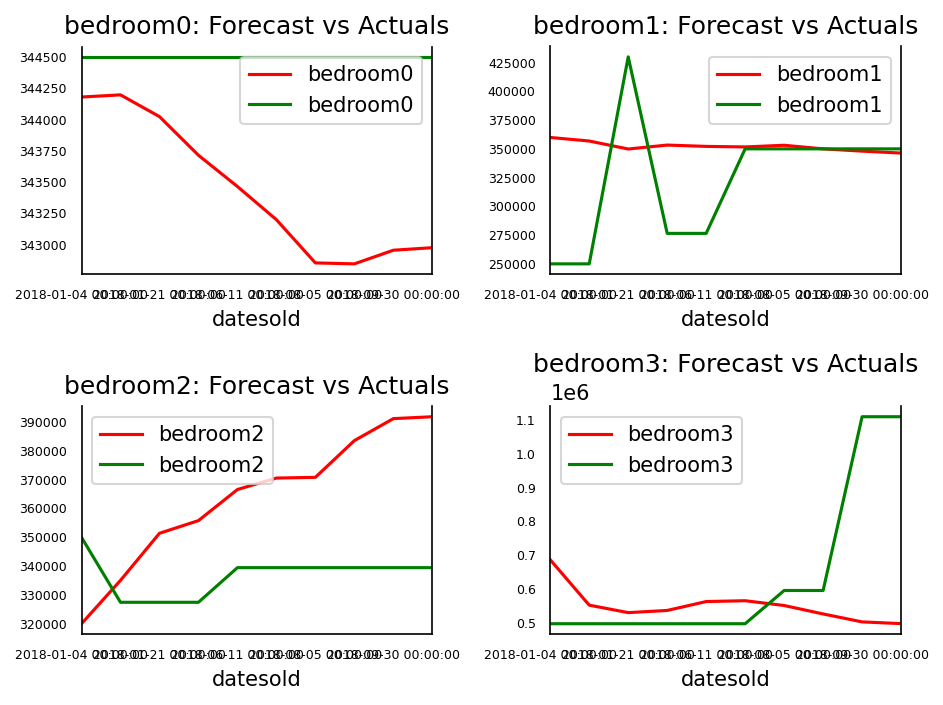

In [128]:
fig, axes = plt.subplots(nrows=int(len(time_series.columns)/2), ncols=2, dpi=150)

for i, (col,ax) in enumerate(zip(time_series.columns, axes.flatten())):
    df_forecast[col].plot(legend=True, ax=ax,color='red').autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax,color='green')
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [127]:
print('Forecast Accuracy of: bedroom0')
accuracy_prod = forecast_accuracy(df_forecast['bedroom0'].values, df_test['bedroom0'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: bedroom1')
accuracy_prod = forecast_accuracy(df_forecast['bedroom1'].values, df_test['bedroom1'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: bedroom2')
accuracy_prod = forecast_accuracy(df_forecast['bedroom2'].values, df_test['bedroom2'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: bedroom3')
accuracy_prod = forecast_accuracy(df_forecast['bedroom3'].values, df_test['bedroom3'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

print('Forecast Accuracy of: bedroom4')
accuracy_prod = forecast_accuracy(df_forecast['bedroom4'].values, df_test['bedroom4'])
for k, v in accuracy_prod.items(): print(adjust(k), ': ', round(v,4))

Forecast Accuracy of: bedroom0
mape   :  0.0031
me     :  -1058.1947
mae    :  1058.1947
mpe    :  -0.0031
rmse   :  1180.2413
corr   :  nan
minmax :  0.0031
Forecast Accuracy of: bedroom1
mape   :  0.1634
me     :  28811.5267
mae    :  45974.6902
mpe    :  0.1229
rmse   :  64465.7235
corr   :  -0.7268
minmax :  0.1253
Forecast Accuracy of: bedroom2
mape   :  0.0967
me     :  26724.2525
mae    :  32709.714
mpe    :  0.0796
rmse   :  35129.9817
corr   :  0.0823
minmax :  0.0878
Forecast Accuracy of: bedroom3
mape   :  0.22
me     :  -88444.1432
mae    :  178593.9562
mpe    :  -0.0384
rmse   :  283380.9121
corr   :  -0.5434
minmax :  0.2041
Forecast Accuracy of: bedroom4
mape   :  0.0776
me     :  -47332.8025
mae    :  47332.8025
mpe    :  -0.0776
rmse   :  51402.3796
corr   :  nan
minmax :  0.0776


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
<ipython-input-55-683a770b75d4>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  mins = np.amin(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
<ipython-input-55-683a770b75d4>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  maxs = np.amax(np.hstack([forecast[:,None], actual[:,None]]), axis=1)
